In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [3]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

In [4]:
print(steel.head(10))

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo’s Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   
5     6     New Texas Giant        Six Flags Over Texas   Arlington, Texas   
6     7             Goliath      Six Flags Over Georgia       Austell, Ga.   
7     8         Intimidator                   Carowinds    Charlotte, N.C.   
8     9       Magnum XL-200                 Cedar Point     Sandusky, Ohio   
9    10     Intimidator-305              Kings Dominion       Doswell, Va.   

         Supplier  Year Built  Points  Year of Rank  
0         Intamin        2000    1204          2013  
1         Intamin        2000    

In [5]:
print(wood.head(10))

   Rank               Name                       Park             Location  \
0     1       Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2            El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3            Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4         The Voyage              Holiday World    Santa Claus, Ind.   
4     5        Thunderhead                  Dollywood  Pigeon Forge, Tenn.   
5     6    Ravine Flyer II                  Waldameer            Erie, Pa.   
6     7         Outlaw Run         Silver Dollar City         Branson, Mo.   
7     8          The Beast               Kings Island    Kings Mills, Ohio   
8     9    Lightning Racer                Hersheypark         Hershey, Pa.   
9    10  Shivering Timbers       Michigan’s Adventure      Muskegon, Mich.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        20

In [6]:
park = wood.Park[wood.Name =='El Toro']

In [7]:
rank = wood.Rank[(wood.Name == 'El Toro') & (wood.Park == 'Six Flags Great Adventure')]

In [8]:
wood.columns =['Rank', 'Name', 'Park', 'Location', 'Supplier', 'year_built', 'points', 'year_rank'] 
year= wood.year_rank[(wood.Name == 'El Toro') & (wood.Park == 'Six Flags Great Adventure')]

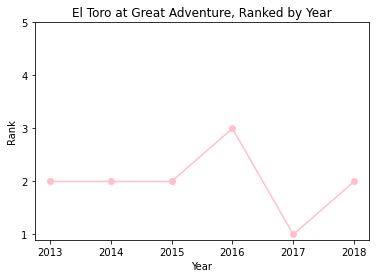

In [9]:
plt.xlabel("Year")
plt.ylabel("Rank")

plt.plot(year, rank, marker = 'o', color='pink')
plt.title("El Toro at Great Adventure, Ranked by Year")
ax = plt.gca()
ax.set_xticks(year)
ax.set_yticks([1,2,3,4,5])
plt.show()

In [10]:
rank2 = wood.Rank[wood.Name == 'Boulder Dash']

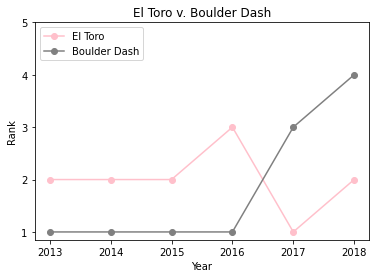

In [11]:
x = year
y1 = rank
y2 = rank2

plt.plot(x, y1, marker='o', color='pink')
plt.plot(x, y2, marker='o', color='gray')

ax = plt.gca()
ax.set_xticks(year)
ax.set_yticks([1,2,3,4,5])

plt.title("El Toro v. Boulder Dash")
plt.xlabel("Year")
plt.ylabel("Rank")
plt.legend(["El Toro","Boulder Dash"], loc=2)
plt.show()

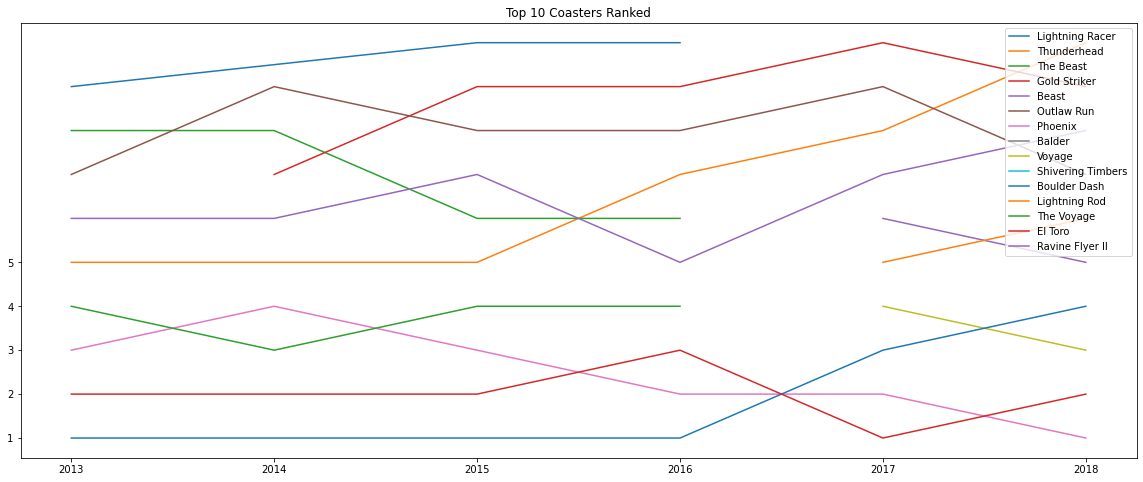

In [17]:
top_10_rankings = wood[wood['Rank'] <= 10]

plt.figure(figsize=(20, 8))
plt.title("Top 10 Coasters Ranked")
for coaster in set(top_10_rankings['Name']):
    coaster_rankings = top_10_rankings[top_10_rankings['Name'] == coaster]
    ax = plt.gca()
    ax.plot(coaster_rankings['year_rank'],coaster_rankings['Rank'], label = coaster)
    plt.legend(loc=1)
    ax.set_yticks([1,2,3,4,5])


plt.show()


In [13]:
roller = pd.read_csv('roller.csv')

In [14]:
print(roller.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


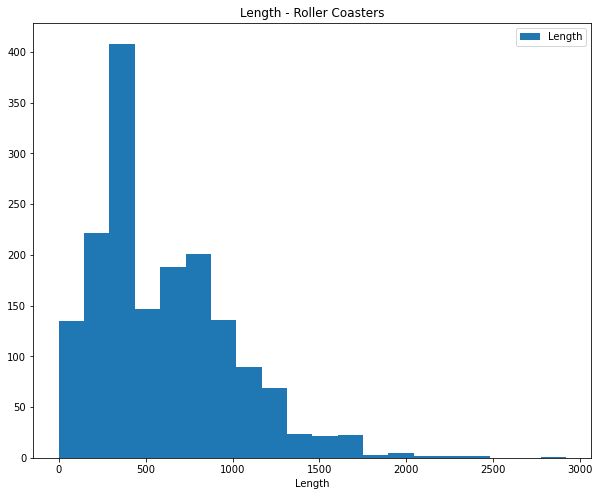

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(10, 8))
plt.hist(roller['length'], bins=20)
plt.legend(["Length"])

ax = plt.gca()
plt.title("Length - Roller Coasters")
plt.xlabel("Length")
plt.show()
plt.savefig('my_histogram.png')


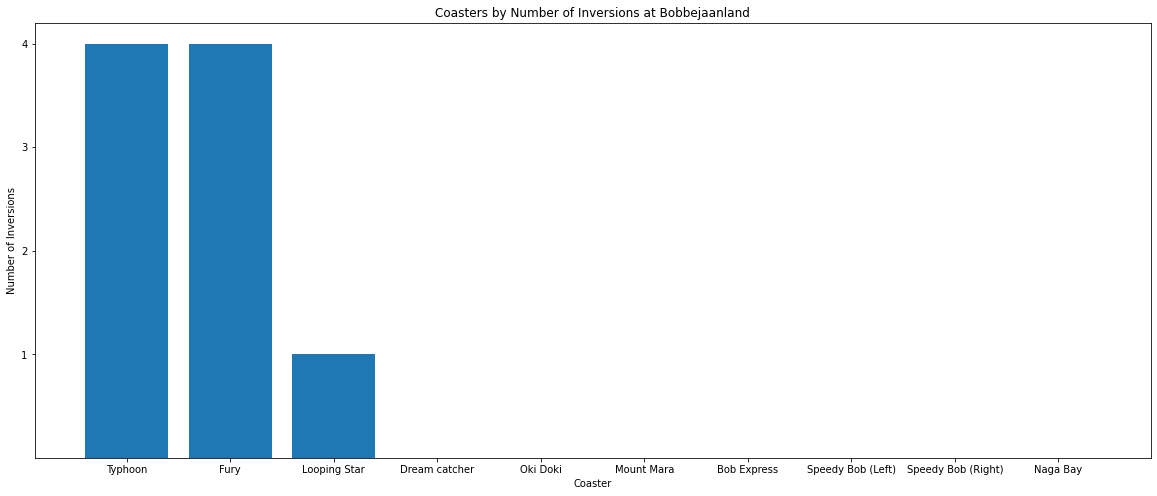

In [18]:
park_coasters = roller[roller['park'] == 'Bobbejaanland']
park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
names= park_coasters['name']
number_inversions = park_coasters['num_inversions']
plt.figure(figsize=(20, 8))
plt.title("Coasters by Number of Inversions at Bobbejaanland")
plt.xlabel("Coaster")
plt.ylabel("Number of Inversions")
plt.bar(names, number_inversions)

ax = plt.gca()
ax.set_xticks(names)
ax.set_yticks([1,2,3,4])

plt.show()

In [21]:
operating = roller[roller['status'] == 'status.operating']
nonop = roller[roller['status'] == 'status.closed.definitely']
num1= len(operating)
num2 = len(nonop)
print(num1, num2)



2172 439


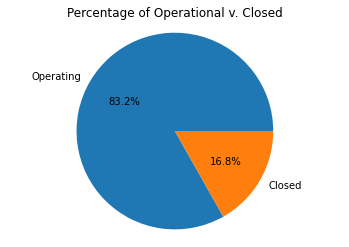

In [24]:
labelsn = ["Operating", "Closed"]
freqs = [2172, 439]

plt.pie(freqs, labels=labelsn,
        autopct='%0.1f%%')
plt.axis('equal')
plt.title("Percentage of Operational v. Closed")
plt.show()

In [25]:
roller.corr()

,speed,height,length,num_inversions
speed,1.000000,0.369112,0.664873,0.350204
height,0.369112,1.000000,0.240986,0.156852
length,0.664873,0.240986,1.000000,0.223104
num_inversions,0.350204,0.156852,0.223104,1.000000


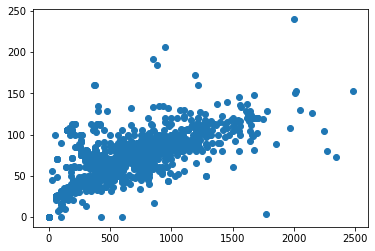

In [28]:
length = roller['length']
speed = roller['speed']
plt.scatter(length,speed)
plt.show()